In [202]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


X, y = make_classification(n_samples=3000,
                           n_features=10,
                           n_informative=5,
                           n_classes=2,
                           random_state=42,
                           n_redundant=2,
                           shuffle=True)

# Converting to pandas dataframe
df = pd.DataFrame({'X_A':X[:,0], 'X_B':X[:,1], 'X_C':X[:,2], 'X_D':X[:,3], 'X_D':X[:,4], 'X_E':X[:,5],
                   'X_F':X[:,6], 'X_G':X[:,7], 'X_I':X[:,8], 'X_J':X[:,9]})


X_df = df

In [203]:
X_df.head(3)

,X_A,X_B,X_C,X_D,X_E,X_F,X_G,X_I,X_J
0,1.410580,-0.049361,-0.697806,-2.309817,-1.561517,0.096659,0.388382,2.027015,-1.954503
1,-0.133019,-1.106122,-2.035283,0.713020,0.939141,-2.566454,-2.824373,0.837529,-0.118245
2,-0.707181,-0.666710,-2.948409,-0.658751,-0.149534,-0.978965,-1.178977,0.040190,1.567323


In [204]:
# Train and test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.20, random_state=42)

In [205]:
from sklearn.metrics import classification_report

clf = RandomForestClassifier(n_estimators=5, class_weight="balanced", oob_score=True, random_state=42)
clf.fit(X_train, y_train)
y_hat_train = clf.predict(X_train)
y_hat = clf.predict(X_test)

print("\n--------Train dataset classification report----------\n")
target_names = ['class 0', 'class 1']
print(classification_report(y_train, y_hat_train, target_names=target_names))

print("\n--------Test dataset classification report----------\n")
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_hat, target_names=target_names))


--------Train dataset classification report----------

             precision    recall  f1-score   support

    class 0       0.99      0.99      0.99      1207
    class 1       0.99      0.99      0.99      1193

avg / total       0.99      0.99      0.99      2400


--------Test dataset classification report----------

             precision    recall  f1-score   support

    class 0       0.83      0.85      0.84       292
    class 1       0.85      0.84      0.85       308

avg / total       0.84      0.84      0.84       600



In [206]:
print(np.unique(y_train))
feature_names = list(X_train.columns)
print(feature_names)

[0 1]
['X_A', 'X_B', 'X_C', 'X_D', 'X_E', 'X_F', 'X_G', 'X_I', 'X_J']


In [207]:
from skater.core.explanations import Interpretation
#from skater.core.global_interpretation.tree_surrogate import TreeSurrogate
from skater.util.dataops import show_in_notebook

interpreter = Interpretation(X_train, feature_names=feature_names)
# Using the interpreter instance invoke call to the TreeSurrogate
surrogate_explainer = interpreter.tree_surrogate(estimator_type='classifier', class_weight="balanced",
                                                 feature_names=feature_names, 
                                                 class_names=['0', '1'], seed=42)

In [208]:
surrogate_explainer.learn(X_train, y_hat_train, oracle_y=y_train, prune=False)

2018-08-22 06:19:07,296 - skater.model.base - WARNING - No examples provided, cannot infer model type
2018-08-22 06:19:07,299 - skater.core.global_interpretation.tree_surrogate - WARNING - fidelity score:0.013333333333333308 of the surrogate model is higher than the impurity threshold: 0.01


0.013333333333333308

In [209]:
y_hat = surrogate_explainer.predict(X_test)
print("\n--------Test dataset classification report----------\n")
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_hat, target_names=target_names))


--------Test dataset classification report----------

             precision    recall  f1-score   support

    class 0       0.81      0.81      0.81       292
    class 1       0.82      0.81      0.82       308

avg / total       0.81      0.81      0.81       600



In [210]:
%matplotlib inline
surrogate_explainer.plot_global_decisions(colors=['lightsteelblue','darkkhaki'], 
                                          file_name='tree_experiment.png', show_img=False)

2018-08-22 06:19:35,867 - skater.util.dataops - INFO - File Name: tree_experiment.png


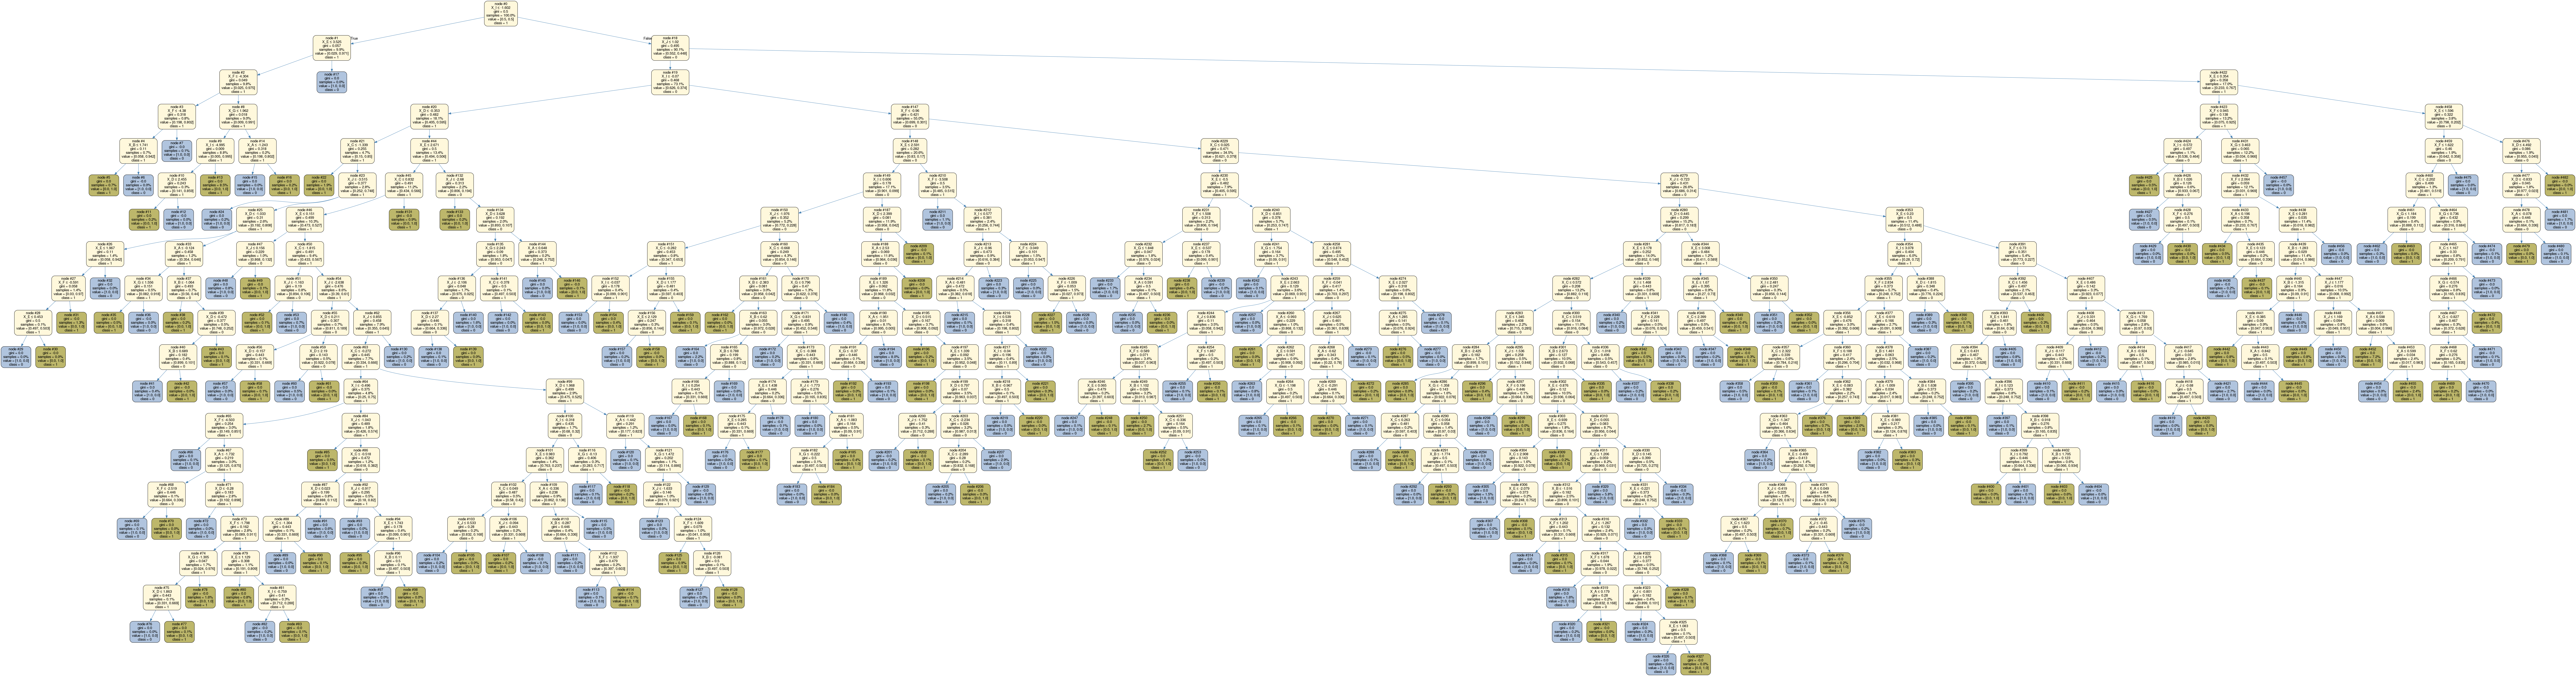

In [211]:
show_in_notebook('tree_experiment.png', width=800, height=400)

In [216]:
params = {"criterion": ['gini', 'entropy'], "min_samples_leaf": [4, 6],
"max_leaf_nodes": [12, 20], "max_depth": [10, 12]
}

#surrogate_explainer.learn(X_train, y_hat_train, oracle_y=y_train, prune=True, cv=10, param_grid=params)
surrogate_explainer.learn(X_train, y_hat_train, oracle_y=y_train, prune=True, cv=4, param_grid=params)

2018-08-22 06:20:32,201 - skater.model.base - WARNING - No examples provided, cannot infer model type
2018-08-22 06:20:32,203 - skater.core.global_interpretation.tree_surrogate - WARNING - fidelity score:0.15055466996268785 of the surrogate model is higher than the impurity threshold: 0.01


0.15055466996268785

In [217]:
y_hat = surrogate_explainer.predict(X_test)
print("\n--------Test dataset classification report----------\n")
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_hat, target_names=target_names))


--------Test dataset classification report----------

             precision    recall  f1-score   support

    class 0       0.81      0.80      0.81       292
    class 1       0.81      0.82      0.82       308

avg / total       0.81      0.81      0.81       600



In [218]:
surrogate_explainer.estimator.get_params()

{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': None,
 'max_leaf_nodes': 20,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': 42,
 'splitter': 'best'}

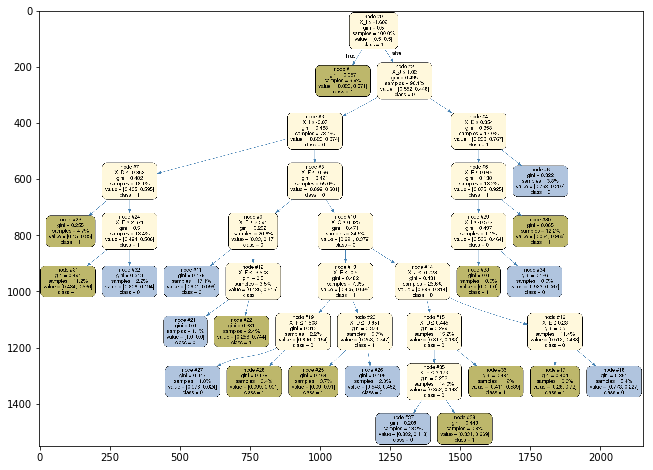

In [219]:
surrogate_explainer.plot_global_decisions(colors=['lightsteelblue','darkkhaki'], file_name='tree_pruned.png')

2018-08-22 06:20:59,764 - skater.util.dataops - INFO - File Name: tree_pruned.png


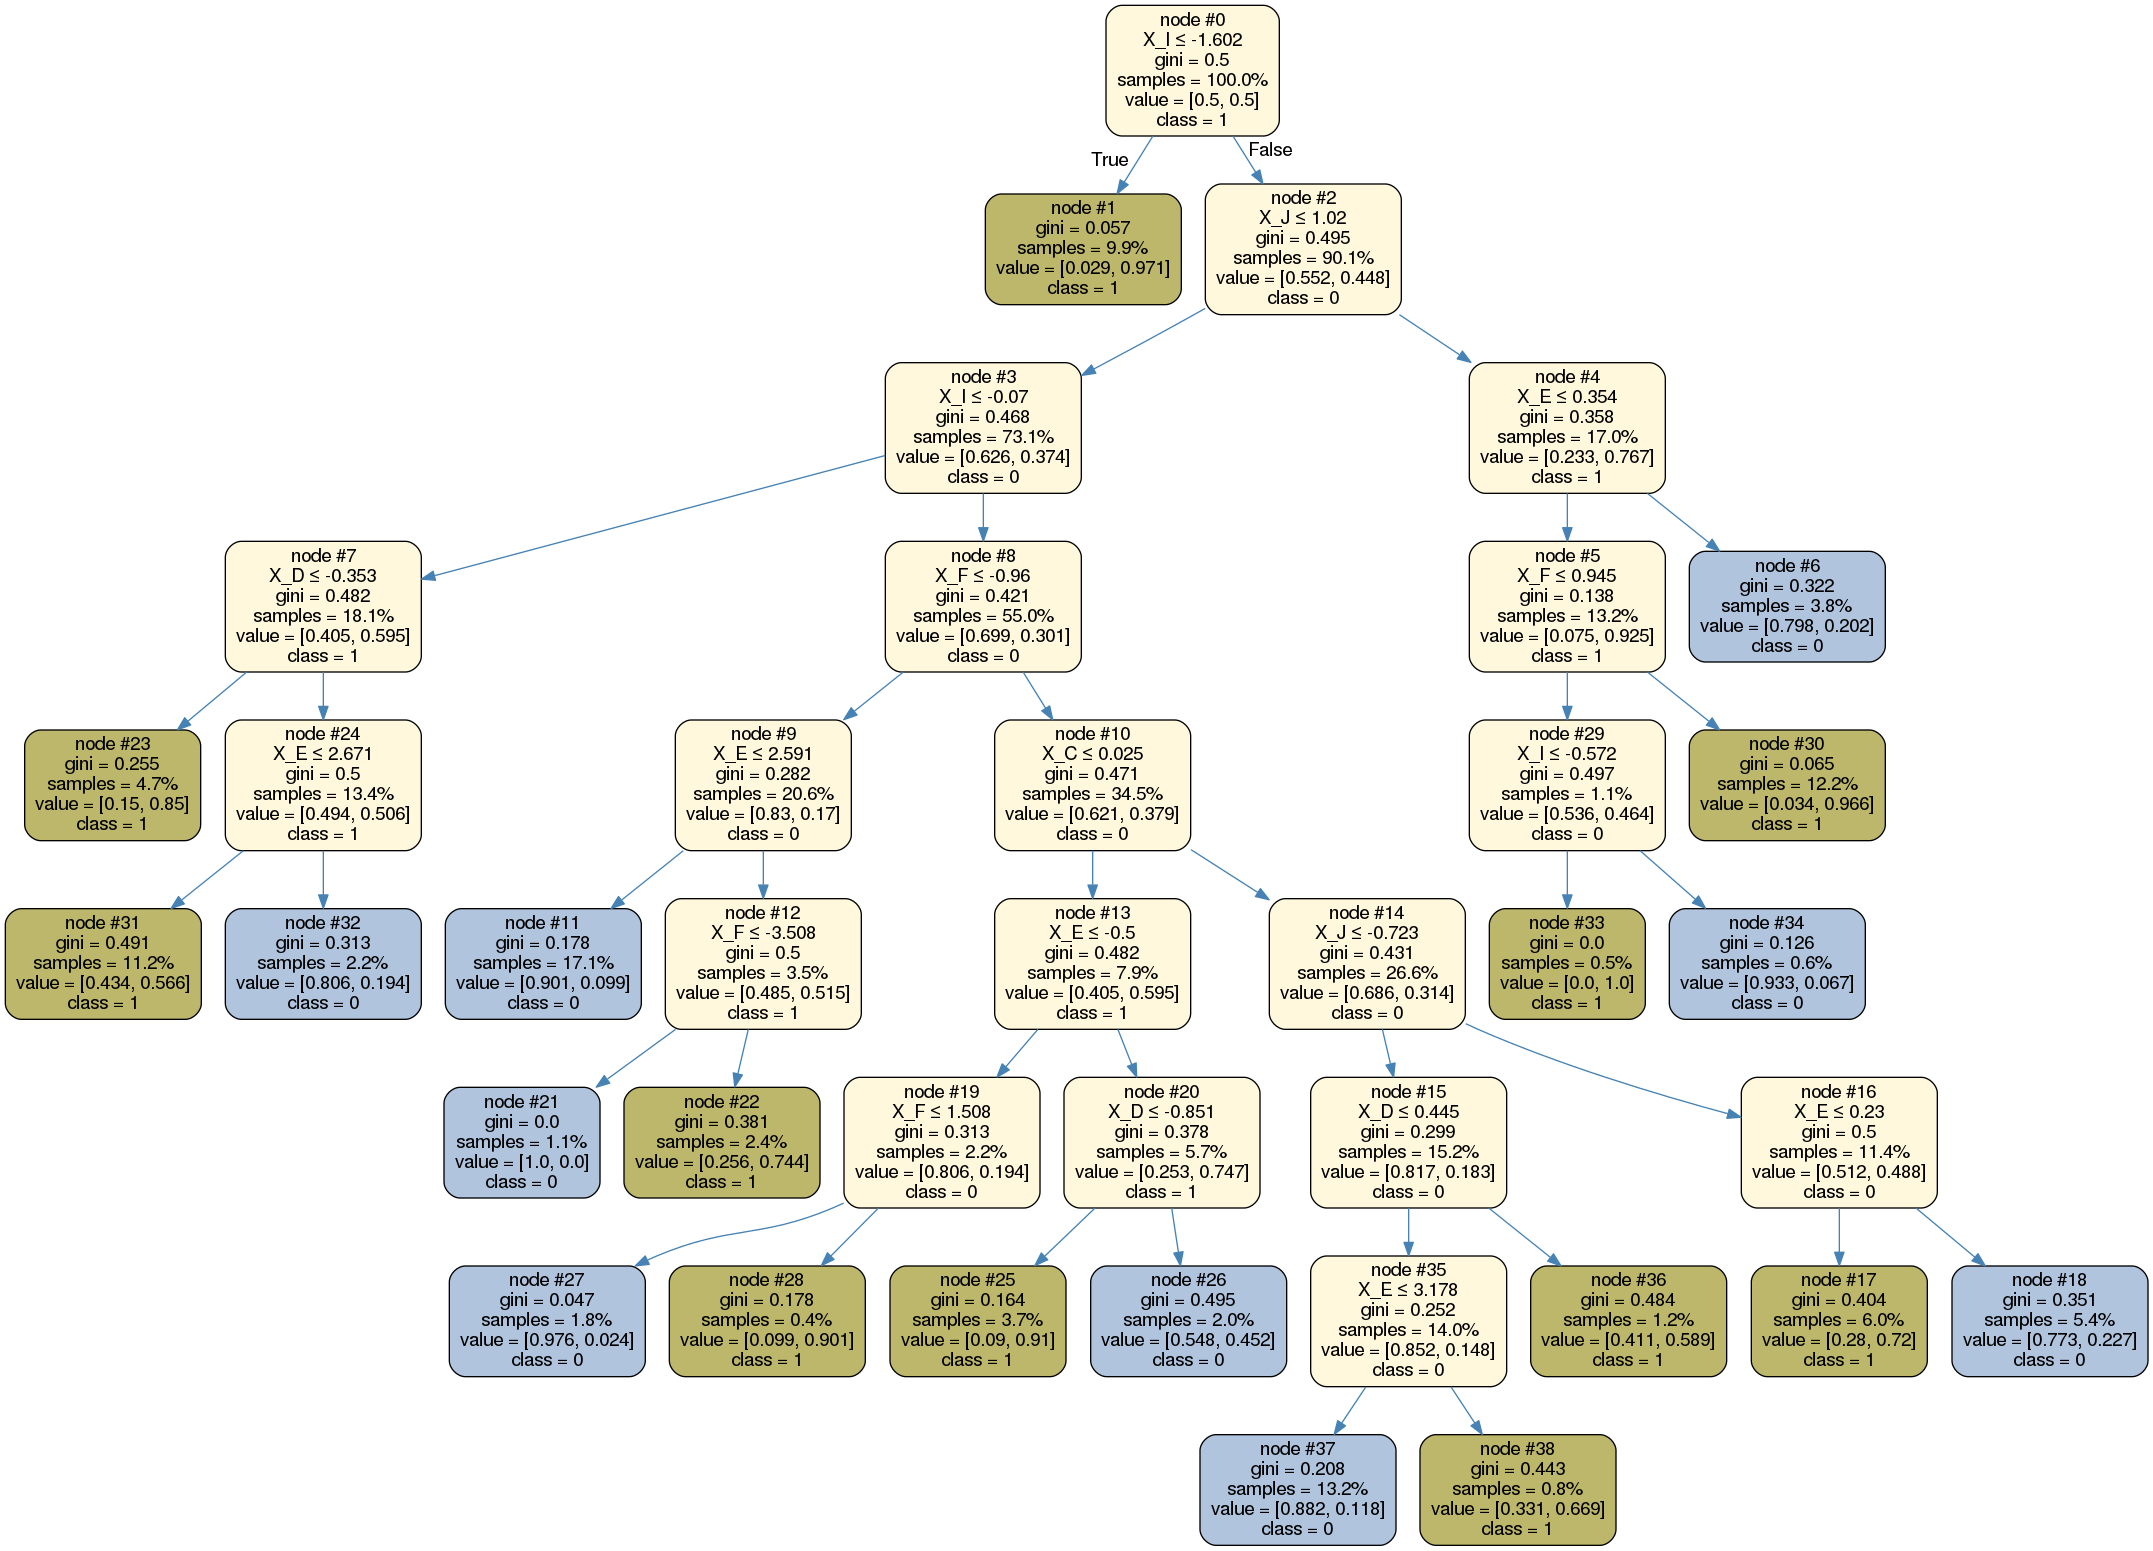

In [220]:
show_in_notebook('tree_pruned.png', width=300, height=300)